In [19]:
import sys
sys.path.append('../')
import pandas as pd
import seaborn as sns; sns.set(style='darkgrid', context='notebook')
from figures.plotting import plot_eigenspectrum, annotate_corr
from matplotlib import pyplot as plt

eigmetric = 'effective dimensionality'

eigspec = pd.read_csv(f'../results/counter-example|eigspectra.csv')
data = pd.merge(pd.read_csv(f'../results/counter-example|encoding.csv'),
                pd.read_csv(f'../results/counter-example|eigmetrics.csv'), 
                on=['architecture', 'task', 'kind', 'source', 'layer'])
data.head()

,layer,score,score_error,architecture,task,kind,source,80% variance,alpha,effective dimensionality
0,layer1.0.relu,0.108530,0.003920,ResNet18,Object Classification (CIFAR10),Supervised,Counter-Example,7.0,1.691016,4.325100
1,layer1.1.relu,0.114241,0.004277,ResNet18,Object Classification (CIFAR10),Supervised,Counter-Example,7.0,1.624797,4.349708
2,layer2.0.relu,0.114424,0.004113,ResNet18,Object Classification (CIFAR10),Supervised,Counter-Example,16.0,1.296701,4.362206
3,layer2.1.relu,0.121609,0.003872,ResNet18,Object Classification (CIFAR10),Supervised,Counter-Example,18.0,1.241868,3.728810
4,layer3.0.relu,0.119599,0.005342,ResNet18,Object Classification (CIFAR10),Supervised,Counter-Example,46.0,1.071005,3.478001


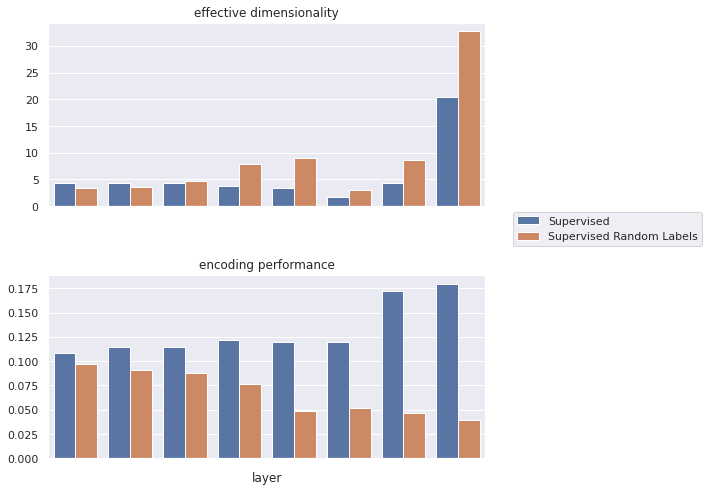

In [40]:
fig, axs = plt.subplots(2, 1, figsize=(10, 7))
sns.barplot(x='layer', y=eigmetric, hue='kind', data=data, ax=axs[0])
axs[0].set(xticklabels=[], xlabel=None, ylabel=None, title=eigmetric)
axs[0].legend(bbox_to_anchor=(1.05, 0), loc='upper left')
sns.barplot(x='layer', y='score', hue='kind', data=data, ax=axs[1])
axs[1].set(xticklabels=[], ylabel=None, title='encoding performance')
axs[1].legend().remove()
fig.tight_layout()
plt.show()

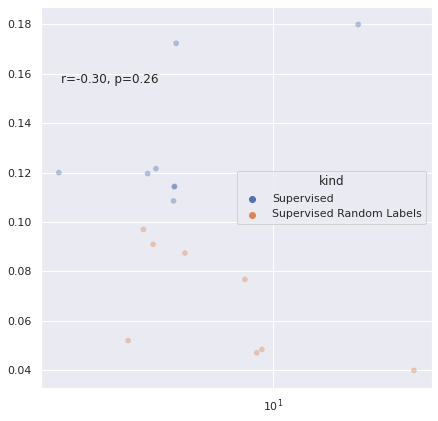

In [22]:
_, ax = plt.subplots(figsize=(7, 7))
sns.scatterplot(data=data, x=eigmetric, y='score', alpha=0.4, ax=ax, hue='kind')
ax.set(xlabel=None, ylabel=None, xscale='log')
annotate_corr(data, x=eigmetric, y='score')
plt.show()